## Import

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import math

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

plt.style.use('fivethirtyeight')

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Dataset

In [3]:
!cat MSFT.csv

Streaming output truncated to the last 5000 lines.
2002-05-17,28.105000,28.200001,27.635000,28.014999,17.702490,54646200
2002-05-20,27.750000,27.775000,26.750000,27.004999,17.064276,52115800
2002-05-21,26.975000,27.299999,26.065001,26.094999,16.489254,63120000
2002-05-22,25.934999,26.860001,25.924999,26.844999,16.963181,54169400
2002-05-23,26.850000,27.420000,26.504999,27.410000,17.320190,51412800
2002-05-24,27.070000,27.260000,26.520000,26.629999,16.827314,35982000
2002-05-28,26.795000,26.844999,25.875000,26.160000,16.530327,49602000
2002-05-29,25.825001,26.360001,25.775000,26.025000,16.445017,45393200
2002-05-30,25.820000,26.680000,25.715000,26.320000,16.631430,63213000
2002-05-31,26.450001,26.709999,25.440001,25.455000,16.084843,66468000
2002-06-03,25.495001,25.820000,24.584999,24.709999,15.614081,88439000
2002-06-04,24.750000,25.615000,24.620001,24.990000,15.791014,88008400
2002-06-05,25.215000,25.875000,25.165001,25.830000,16.321808,66969400
2002-06-06,25.750000,26.070000,25.00000

## Read Dataset

In [6]:
df = pd.read_csv('MSFT.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


In [7]:
df.shape

(9083, 7)

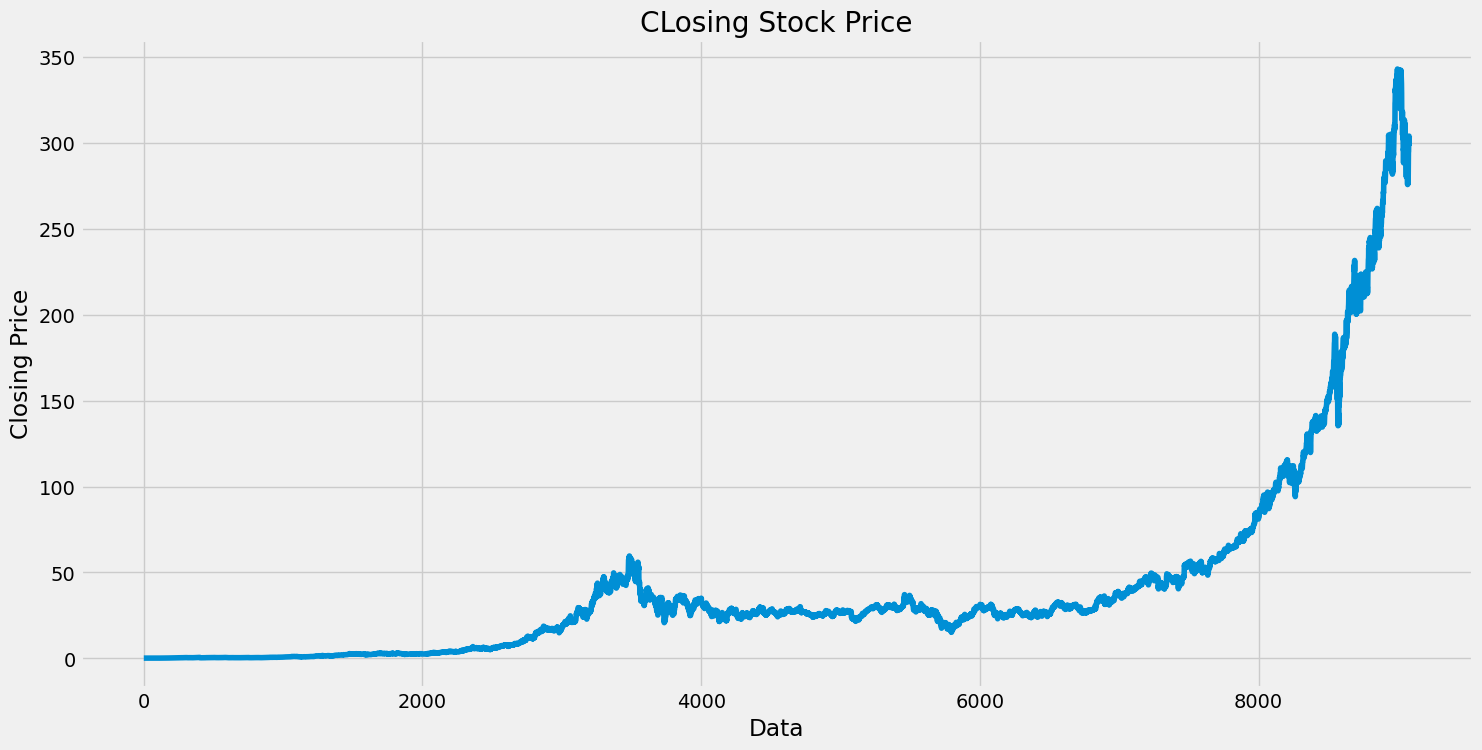

In [8]:
plt.figure(figsize=(16, 8))
plt.title("CLosing Stock Price")

plt.plot(df["Close"])

plt.xlabel("Data")
plt.ylabel("Closing Price")
plt.show()

In [10]:
data = df.filter(['Close'])

dataset = data.values

training_data_length = math.ceil(len(dataset) * 0.8)
training_data_length

7267

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

print("Mean of scaled Data:", scaled_data.mean())
print("STD of scaled Data:", scaled_data.std())

Mean of scaled Data: 1.0013153162753806e-16
STD of scaled Data: 1.0


In [12]:
train_data = scaled_data[0:training_data_length, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i])

In [14]:
print(len(x_train))

7207


In [16]:
x_train[0]

array([[-0.69063008],
       [-0.69057193],
       [-0.69054284],
       [-0.69058647],
       [-0.69061554],
       [-0.69065915],
       [-0.69070276],
       [-0.69074637],
       [-0.6907173 ],
       [-0.69067369],
       [-0.69064461],
       [-0.69065915],
       [-0.69067369],
       [-0.69065915],
       [-0.69064461],
       [-0.69064461],
       [-0.69067369],
       [-0.69065915],
       [-0.69063008],
       [-0.69061554],
       [-0.69058647],
       [-0.69057193],
       [-0.69057193],
       [-0.69051377],
       [-0.69049923],
       [-0.69055738],
       [-0.69055738],
       [-0.69058647],
       [-0.6905792 ],
       [-0.69041201],
       [-0.6902957 ],
       [-0.69028116],
       [-0.69033933],
       [-0.69038294],
       [-0.69041201],
       [-0.69041201],
       [-0.69042655],
       [-0.69041201],
       [-0.69041201],
       [-0.69039747],
       [-0.69041201],
       [-0.69039747],
       [-0.69038294],
       [-0.69039747],
       [-0.69039747],
       [-0

In [17]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
x_train.shape

(7207, 60, 1)

In [20]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [22]:
x_train.shape

(7207, 60, 1)

## Model

In [24]:
model = Sequential()

model.add(LSTM(200, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(200, return_sequences=False))

model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))

In [28]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 200)           161600    
                                                                 
 lstm_3 (LSTM)               (None, 200)               320800    
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 507,601
Trainable params: 507,601
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
226/226 [==============================] - 111s 454ms/step - loss: 0.0028
Epoch 2/5
226/226 [==============================] - 106s 469ms/step - loss: 2.3531e-04
Epoch 3/5
226/226 [==============================] - 93s 411ms/step - loss: 2.1000e-04
Epoch 4/5
226/226 [==============================] - 74s 325ms/step - loss: 1.9447e-04
Epoch 5/5
226/226 [==============================] - 74s 327ms/step - loss: 1.8200e-04


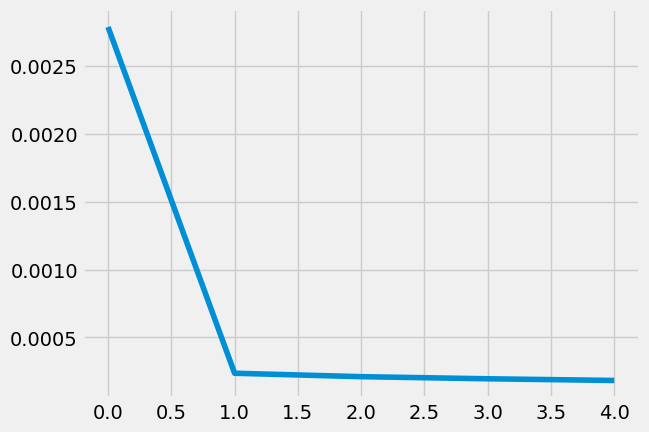

In [31]:
plt.plot(history.history['loss'])

## Test Data for Prediction

In [33]:
test_data = scaled_data[training_data_length - 60:, :]

x_test = []
y_test = dataset[training_data_length:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [34]:
x_test = np.array(x_test)

In [35]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [36]:
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)
print(pred)

57/57 [==============================] - 7s 108ms/step
[[ 46.297844]
 [ 46.320442]
 [ 46.460453]
 ...
 [253.4426  ]
 [256.89264 ]
 [259.22195 ]]
